In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [2]:
bs = 64

In [3]:
path = Path('data')
path.ls()

[PosixPath('data/models'),
 PosixPath('data/Manta'),
 PosixPath('data/Non_Manta')]

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs = 16, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['Manta', 'Non_Manta']

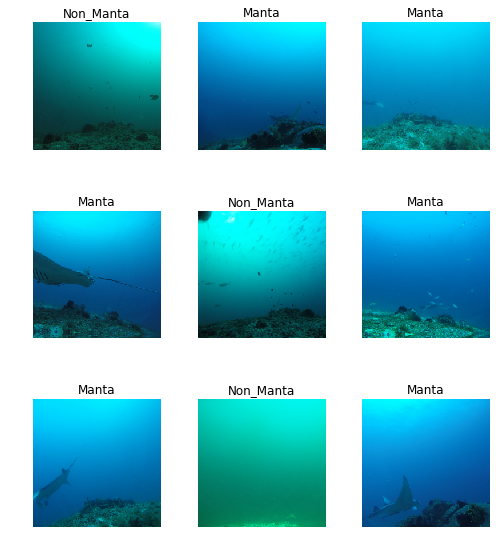

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Manta', 'Non_Manta'], 2, 960, 239)

## Train Model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.626055,0.362787,0.154812,03:06
1,0.458822,0.325881,0.150628,03:09
2,0.341820,0.299031,0.150628,03:10
3,0.279363,0.251838,0.100418,03:08


In [10]:
learn.save('stage-1')

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


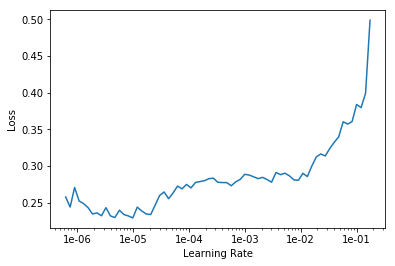

In [12]:
learn.recorder.plot()

In [13]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249297,0.273241,0.083682,03:10
1,0.217499,0.295905,0.083682,03:08
2,0.220796,0.234362,0.083682,03:10
3,0.196046,0.214836,0.079498,03:09


In [14]:
learn.save('stage-2')

## Interpretation

In [15]:
learn.load('stage-2');

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

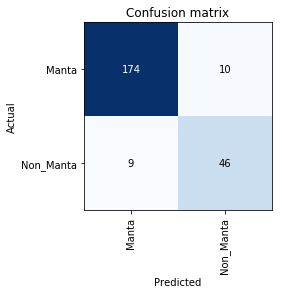

In [17]:
interp.plot_confusion_matrix()

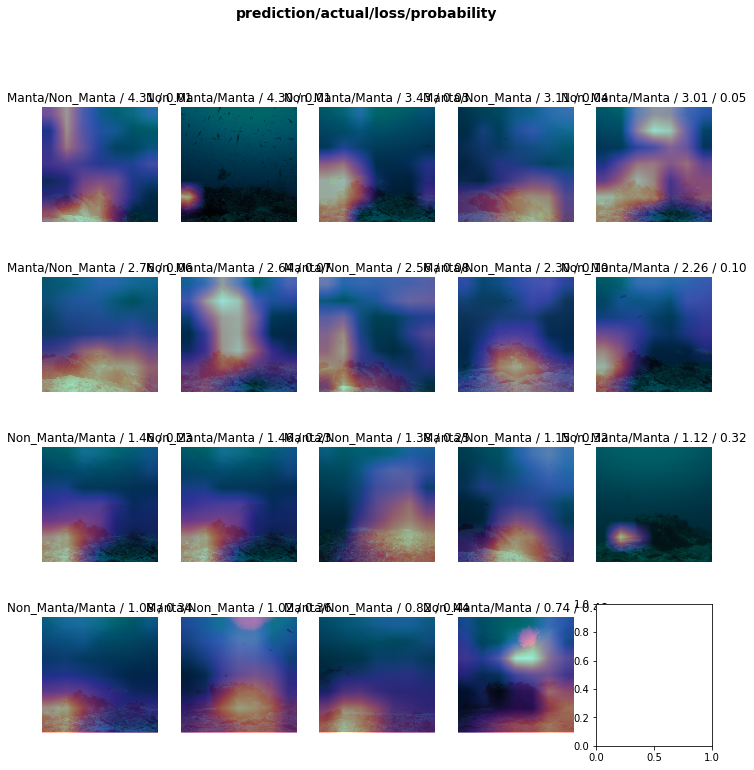

In [18]:
interp.plot_top_losses(19)